In [1]:
# imports 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime as dt
import statistics

%matplotlib inline
plt.style.use('ggplot')

In [57]:
# data file imports.csv
dow = pd.read_csv('data/^DJI.csv')        # Dow Jones Industrial Index - Color = 'red'
nasdaq = pd.read_csv('data/^IXIC.csv')    # Nasdaq Composite Index     - Color = 'blue'
SP500 = pd.read_csv('data/^GSPC.csv')     # S&P 500 Index              - Color = 'green'

### Index funds filtered by year 1985-present and 1999-present

##### Dow Jones Index Filtered

In [3]:
dow_filtered = dow[dow['Date'] > '1985-01-31'].copy()
# dow_filtered_copy = dow_filtered.copy()

In [4]:
dow_filtered["Adj Close Daily Returns"] = dow_filtered['Adj Close'].pct_change(1)
dow_filtered["Volume Daily Returns"] = dow_filtered['Volume'].pct_change(1)

In [79]:
# dow_filtered

In [20]:
dow_filtered1999 = dow[dow['Date'] > '1999-01-31'].copy()
# dow_filtered_copy2000 = dow_filtered2000.copy()

In [21]:
dow_filtered1999["Adj Close Daily Returns"] = dow_filtered1999['Adj Close'].pct_change(1)
dow_filtered1999["Volume Daily Returns"] = dow_filtered1999['Volume'].pct_change(1)

##### Nasdaq Index Filtered

In [22]:
nasdaq_filtered = nasdaq[nasdaq['Date'] > '1985-01-31'].copy()
# nasdaq_filtered_copy = nasdaq_filtered.copy()

In [23]:
nasdaq_filtered1999 = nasdaq[nasdaq['Date'] > '1999-01-31'].copy()
# nasdaq_filtered_copy2000 = nasdaq_filtered2000.copy()

In [24]:
nasdaq_filtered1999["Adj Close Daily Returns"] = nasdaq_filtered1999['Adj Close'].pct_change(1)
nasdaq_filtered1999["Volume Daily Returns"] = nasdaq_filtered1999['Volume'].pct_change(1)

##### S&P500 Index Filtered

In [25]:
SP500_filtered = SP500[SP500['Date'] > '1985-01-31'].copy()
# SP500_filtered_copy = SP500_filtered.copy()

In [26]:
SP500_filtered1999 = SP500[SP500['Date'] > '1999-01-31'].copy()
# SP500_filtered_copy2000 = SP500_filtered2000.copy()

In [27]:
SP500_filtered1999["Adj Close Daily Returns"] = SP500_filtered1999['Adj Close'].pct_change(1)
SP500_filtered1999["Volume Daily Returns"] = SP500_filtered1999['Volume'].pct_change(1)

#####  Index Funds show

In [80]:
dow_filtered1999

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
3539,1999-02-01,9359.599609,9430.660156,9341.580078,9345.700195,9345.700195,77790000,NaN,NaN
3540,1999-02-02,9342.610352,9344.919922,9198.169922,9274.120117,9274.120117,82520000,-0.007659,0.060805
3541,1999-02-03,9272.580078,9398.219727,9239.620117,9366.809570,9366.809570,89760000,0.009994,0.087736
3542,1999-02-04,9365.150391,9397.959961,9274.889648,9304.500000,9304.500000,88340000,-0.006652,-0.015820
3543,1999-02-05,9305.019531,9347.240234,9247.339844,9304.240234,9304.240234,88360000,-0.000028,0.000226
...,...,...,...,...,...,...,...,...,...
9004,2020-10-19,28633.550781,28711.929688,28139.400391,28195.419922,28195.419922,358700000,-0.014364,0.007188
9005,2020-10-20,28245.849609,28575.029297,28243.039063,28308.789063,28308.789063,350220000,0.004021,-0.023641
9006,2020-10-21,28270.660156,28450.640625,28196.390625,28210.820313,28210.820313,299420000,-0.003461,-0.145052
9007,2020-10-22,28197.419922,28421.310547,28040.179688,28363.660156,28363.660156,330320000,0.005418,0.103200


In [30]:
nasdaq_filtered1999

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
7071,1999-02-01,2522.379883,2533.439941,2500.350098,2510.090088,2510.090088,957110000,NaN,NaN
7072,1999-02-02,2512.120117,2512.120117,2442.929932,2463.419922,2463.419922,963710000,-0.018593,0.006896
7073,1999-02-03,2453.229980,2493.580078,2448.550049,2493.409912,2493.409912,1057010000,0.012174,0.096813
7074,1999-02-04,2496.489990,2496.520020,2409.989990,2410.070068,2410.070068,1099190000,-0.033424,0.039905
7075,1999-02-05,2419.929932,2421.429932,2346.820068,2373.620117,2373.620117,1013740000,-0.015124,-0.077739
...,...,...,...,...,...,...,...,...,...
12536,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000,-0.016508,0.094783
12537,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000,0.003276,0.008037
12538,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000,-0.002761,-0.010818
12539,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000,0.001856,-0.008977


In [31]:
SP500_filtered1999

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns
17845,1999-02-01,1279.640015,1283.750000,1271.310059,1273.000000,1273.000000,799400000,NaN,NaN
17846,1999-02-02,1273.000000,1273.489990,1247.560059,1261.989990,1261.989990,845500000,-0.008649,0.057668
17847,1999-02-03,1261.989990,1276.040039,1255.270020,1272.069946,1272.069946,876500000,0.007987,0.036665
17848,1999-02-04,1272.069946,1272.229980,1248.359985,1248.489990,1248.489990,854400000,-0.018537,-0.025214
17849,1999-02-05,1248.489990,1251.859985,1232.280029,1239.400024,1239.400024,872000000,-0.007281,0.020599
...,...,...,...,...,...,...,...,...,...
23310,2020-10-19,3493.659912,3502.419922,3419.929932,3426.919922,3426.919922,4086200000,-0.016330,-0.126113
23311,2020-10-20,3439.379883,3476.929932,3435.649902,3443.120117,3443.120117,3901260000,0.004727,-0.045260
23312,2020-10-21,3439.909912,3464.860107,3433.060059,3435.560059,3435.560059,4097750000,-0.002196,0.050366
23313,2020-10-22,3438.500000,3460.530029,3415.340088,3453.489990,3453.489990,4163630000,0.005219,0.016077


### Dow Jone, Nasdaq, S&P500 since 1985 plotting volume change over time 
    (Volume = index fund price + trasnsactions)

<AxesSubplot:xlabel='Date'>

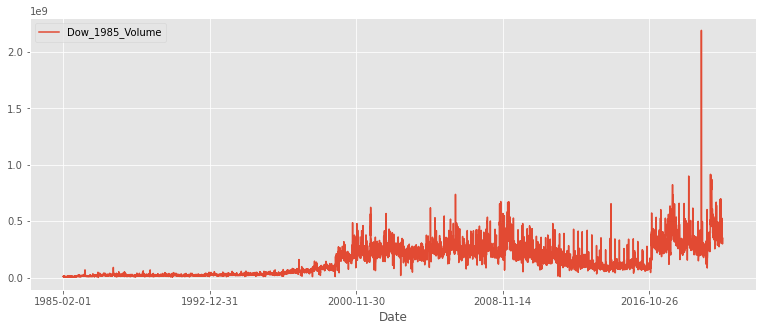

In [14]:
dow_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5))
# plt.vlines(x='2016-11-01', ymin=0, ymax=2)
# xelections = ['2005-01-20', '2009-01-20', '2017-01-20']
# ymin, ymax = plt.ylim()
# plt.vlines(x=xelections, ymin=ymin, ymax=ymax-1, color='r')

<AxesSubplot:xlabel='Date'>

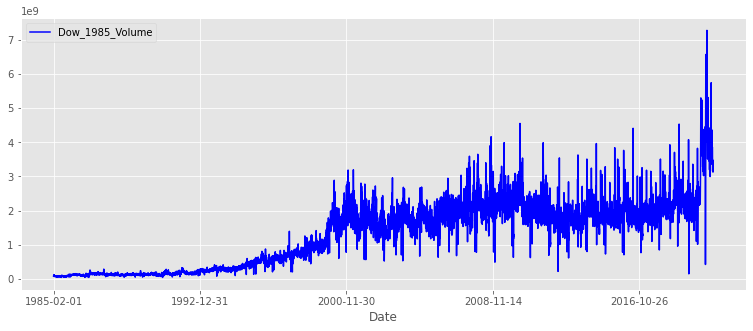

In [43]:
nasdaq_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="blue")

<AxesSubplot:xlabel='Date'>

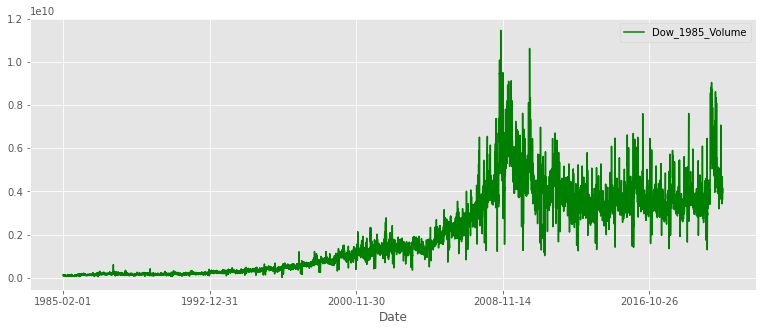

In [56]:
SP500_filtered.plot(x='Date', y='Volume', label='Dow_1985_Volume', figsize=(13,5), color="green")

# Exploratory Data Analysis (EDA)

### Dow since 1999 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

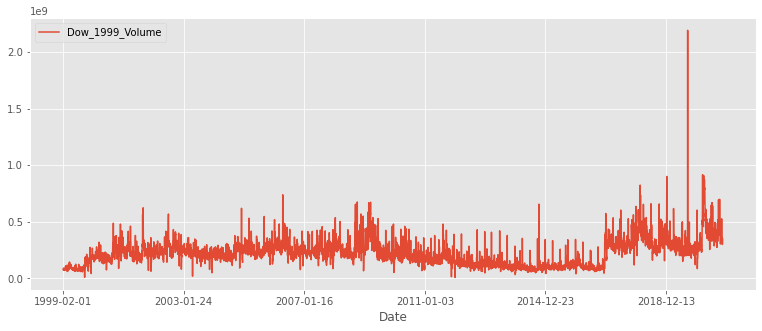

In [45]:
dow_filtered1999.plot(x='Date', y='Volume', label='Dow_1999_Volume', figsize=(13,5))

### Dow since 1985 plotting volume change over time

In [46]:
# dow_filtered.plot(x='Date', y='Adj Close', label='Dow_1985_Adj_Close', figsize=(13,5))

### Dow since 1999 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

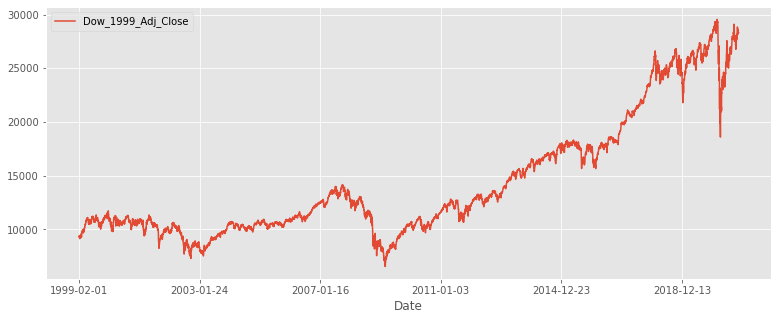

In [47]:
dow_filtered1999.plot(x='Date', y='Adj Close', label='Dow_1999_Adj_Close', figsize=(13,5))

### Dow since 1985 plotting return change over time

In [48]:
# dow_filtered.plot(x='Date', y='Adj Close Daily Returns', label='Dow_1985_VDR', figsize=(13,5))

### Dow since 1999 plotting 'Adj Close Daily Returns'

<AxesSubplot:xlabel='Date'>

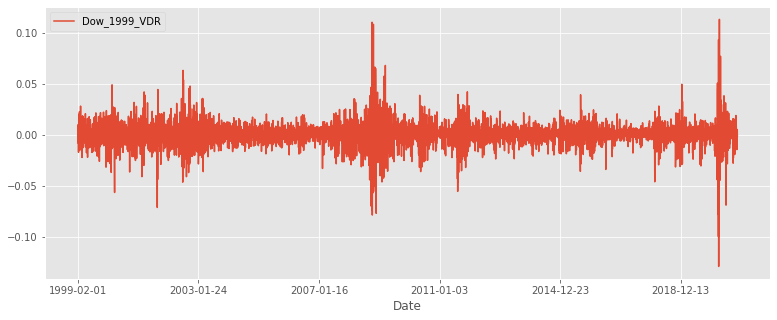

In [49]:
dow_filtered1999.plot(x='Date', y='Adj Close Daily Returns', label='Dow_1999_VDR', figsize=(13,5))

### Dow since 1985 plotting returns change over time

In [50]:
# dow_filtered.plot(x='Date', y='Volume Daily Returns', label='Dow_1985_VDR', figsize=(13,5))

### Dow since 1999 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

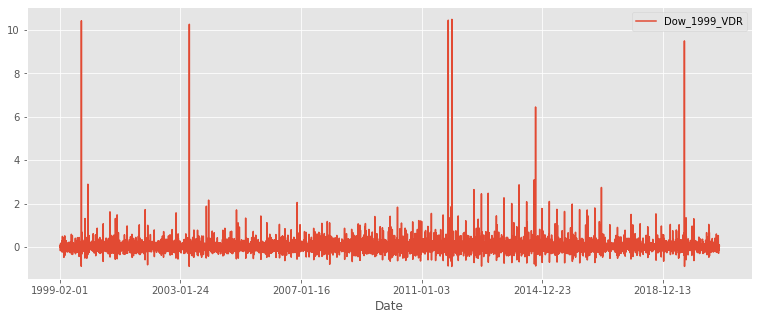

In [51]:
dow_filtered1999.plot(x='Date', y='Volume Daily Returns', label='Dow_1999_VDR', figsize=(13,5))

### Nasdaq since 1999 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

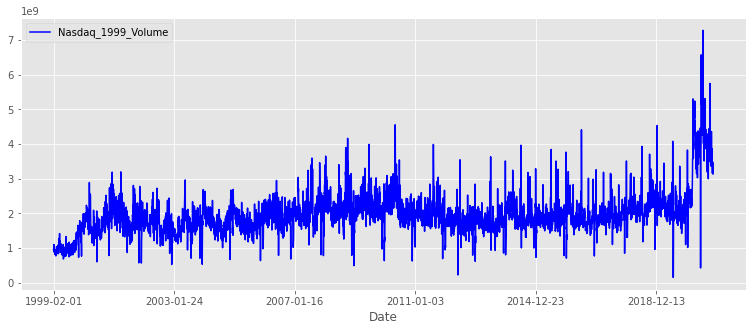

In [58]:
nasdaq_filtered1999.plot(x='Date', y='Volume', label='Nasdaq_1999_Volume', figsize=(13,5), color="blue")

### Nasdaq since 1999 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

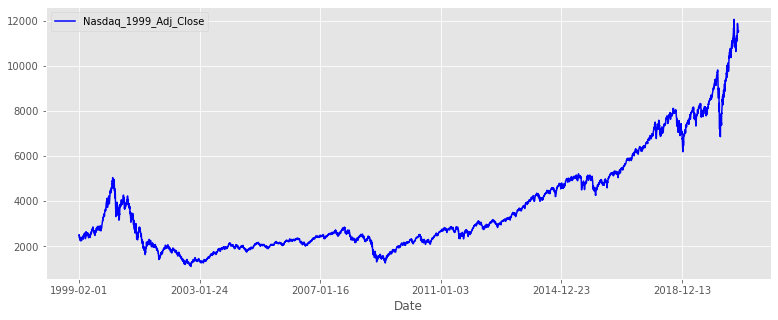

In [59]:
nasdaq_filtered1999.plot(x='Date', y='Adj Close', label='Nasdaq_1999_Adj_Close', figsize=(13,5), color="blue")

### Nasdaq since 1999 plotting 'Adj Close Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

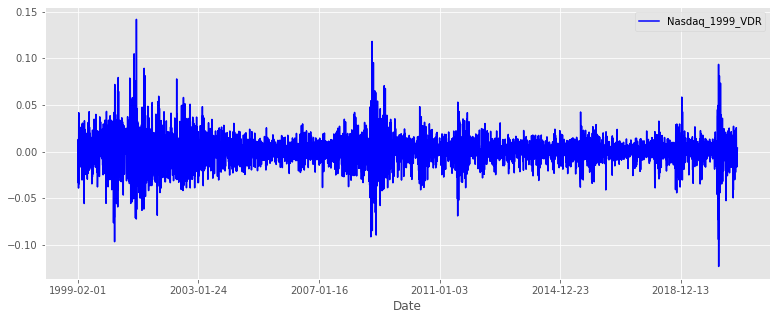

In [60]:
nasdaq_filtered1999.plot(x='Date', y='Adj Close Daily Returns', label='Nasdaq_1999_VDR', figsize=(13,5), color="blue")

### Nasdaq since 1999 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

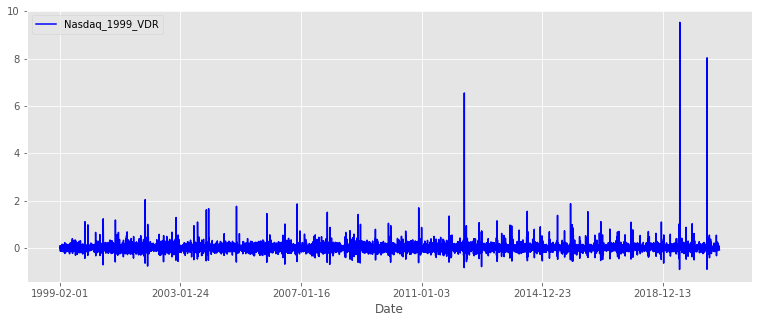

In [61]:
nasdaq_filtered1999.plot(x='Date', y='Volume Daily Returns', label='Nasdaq_1999_VDR', figsize=(13,5), color="blue")

### S&P500 since 1999 plotting 'Volume' change over time

<AxesSubplot:xlabel='Date'>

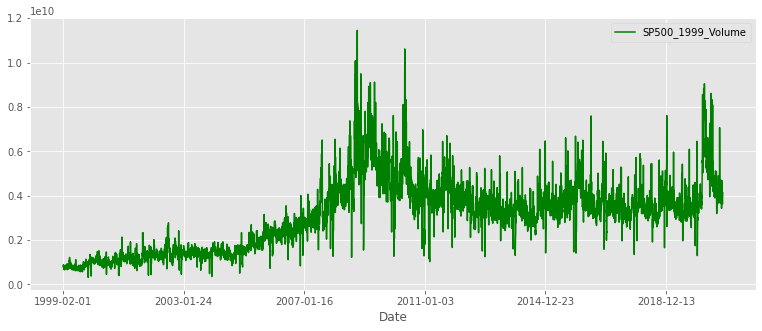

In [62]:
SP500_filtered1999.plot(x='Date', y='Volume', label='SP500_1999_Volume', figsize=(13,5), color="green")

### S&P500  since 1999 plotting 'Adj Close' change over time

<AxesSubplot:xlabel='Date'>

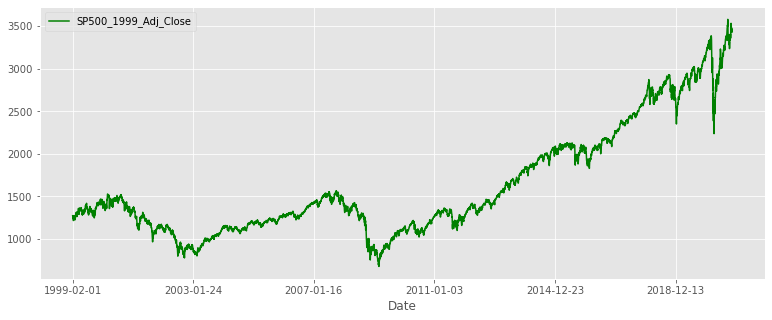

In [63]:
SP500_filtered1999.plot(x='Date', y='Adj Close', label='SP500_1999_Adj_Close', figsize=(13,5), color="green")

### S&P500  since 1999 plotting 'Adj Close Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

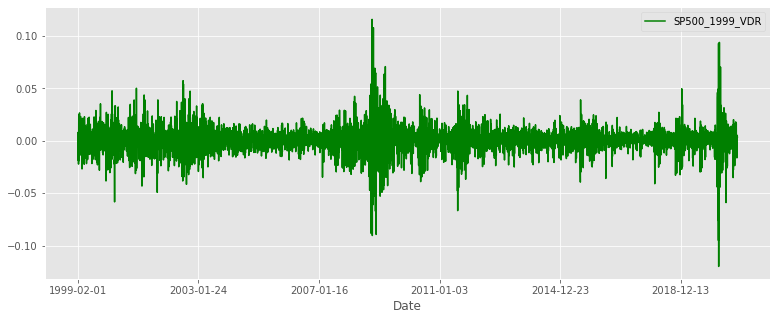

In [64]:
SP500_filtered1999.plot(x='Date', y='Adj Close Daily Returns', label='SP500_1999_VDR', figsize=(13,5), color="green")

### S&P500  since 1999 plotting 'Volume Daily Returns' change over time

<AxesSubplot:xlabel='Date'>

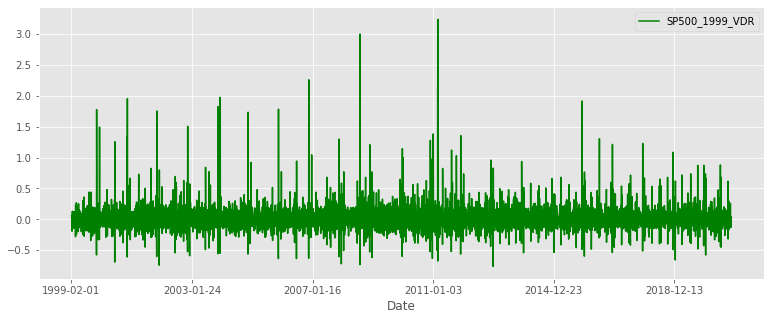

In [65]:
SP500_filtered1999.plot(x='Date', y='Volume Daily Returns', label='SP500_1999_VDR', figsize=(13,5), color="green")

### ^^ Dow Jones, Nasdaq, S&P500 'Adj Close', 'Volume', 'Adj Close Daily Returns', 'Volume Daily Returns' ^^

# Statistic Analysis

### Dow since 1999 plotting for daily return for 'volume' and 'adj close'

(-0.1, 0.1)

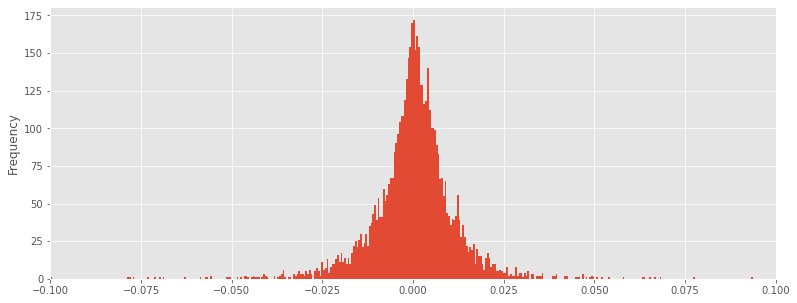

In [77]:
# fig, ax = plt.subplots(1, 2, figsize=(13, 5))
dow_filtered1999['Adj Close Daily Returns'].plot.hist(bins=500, figsize=(13, 5))
plt.xlim(-0.1, 0.1)

(-2.0, 2.0)

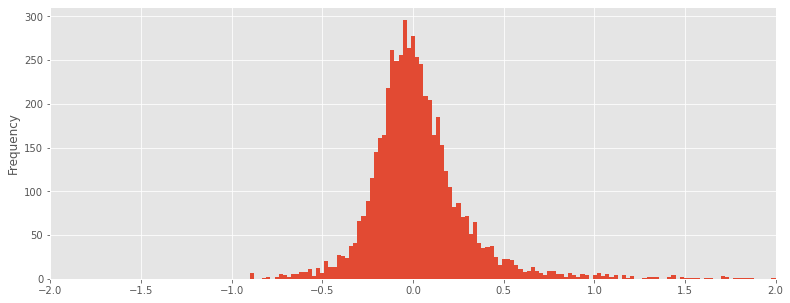

In [78]:
dow_filtered1999['Volume Daily Returns'].plot.hist(bins=500, figsize=(13, 5))
plt.xlim(-2, 2)

<AxesSubplot:ylabel='Frequency'>

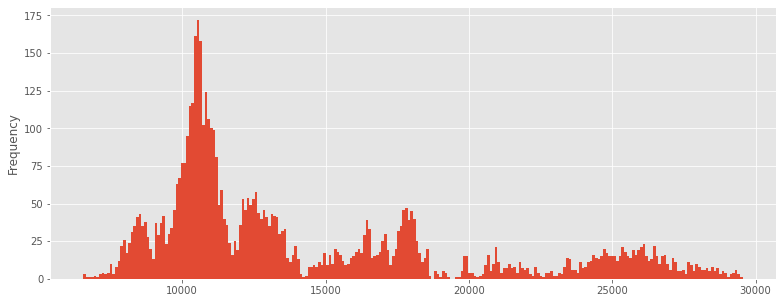

In [93]:
# maybe look into what this can represent? relevant?
dow_filtered1999['Close'].plot.hist(bins=250, figsize=(13, 5))

In [ ]:
# 'ambigious_df' testing

In [94]:
dow_filtered1999['Date'] = pd.to_datetime(dow_filtered1999['Date'])
dow_filtered1999['Year'], dow_filtered1999['Month'], dow_filtered1999['Day'] = dow_filtered1999['Date'].dt.year, dow_filtered['Date'].dt.month, dow_filtered1999['Date'].dt.day
# dow_filtered.groupby(dow_filtered.index).sum()

In [96]:
ambigious_ordered_df = dow_filtered1999.groupby('Year').sum()
ambigious_ordered_df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns,Month,Day
Year,,,,,,,,,,
1999,2.461526e+06,2.480126e+06,2.445188e+06,2.463781e+06,2.463781e+06,23146300000,0.218571,13.561728,1640,3638
2000,2.704319e+06,2.727712e+06,2.681678e+06,2.703803e+06,2.703803e+06,51607850000,-0.042185,10.335129,1642,3970
2001,2.532329e+06,2.551772e+06,2.509177e+06,2.531798e+06,2.531798e+06,59742550000,-0.051222,7.178164,1608,3937
2002,2.323578e+06,2.344878e+06,2.298406e+06,2.322143e+06,2.322143e+06,66317960000,-0.151082,6.280966,1649,3944
2003,2.267435e+06,2.283673e+06,2.252645e+06,2.269672e+06,2.269672e+06,56050110000,0.239493,15.700517,1651,3972
2004,2.598976e+06,2.611770e+06,2.586626e+06,2.599509e+06,2.599509e+06,55494050000,0.036854,6.134412,1654,3972
2005,2.657601e+06,2.670310e+06,2.646306e+06,2.657757e+06,2.657757e+06,63577320000,-0.000804,6.261534,1651,3937
2006,2.861948e+06,2.875309e+06,2.850766e+06,2.863855e+06,2.863855e+06,68377950000,0.155774,7.181713,1640,3966
2007,3.306742e+06,3.325244e+06,3.287957e+06,3.307742e+06,3.307742e+06,61484320000,0.072860,9.045749,1643,3992


In [97]:
ambigious_ordered_df_forM = dow_filtered1999.groupby('Year' and 'Month').sum()
ambigious_ordered_df_forM

,Open,High,Low,Close,Adj Close,Volume,Adj Close Daily Returns,Volume Daily Returns,Year,Day
Month,,,,,,,,,,
1,6.185178e+06,6.219644e+06,6.145208e+06,6.184399e+06,6.184399e+06,105246100000,-0.147302,23.788874,858272,7073
2,5.989696e+06,6.025179e+06,5.950219e+06,5.989276e+06,5.989276e+06,97408970000,-0.110884,8.813794,848007,6112
3,6.714566e+06,6.766908e+06,6.661389e+06,6.717083e+06,6.717083e+06,122007870000,0.206795,17.064067,966545,7634
4,6.482886e+06,6.524062e+06,6.444420e+06,6.487908e+06,6.487908e+06,103680250000,0.590493,12.379193,914335,7108
5,6.718712e+06,6.754677e+06,6.677023e+06,6.718548e+06,6.718548e+06,100740500000,-0.031567,17.519790,936427,7192
6,6.771557e+06,6.810004e+06,6.730652e+06,6.769661e+06,6.769661e+06,104311960000,-0.100093,24.071099,944463,7295
7,6.761659e+06,6.797459e+06,6.724798e+06,6.764953e+06,6.764953e+06,95415680000,0.268479,10.238796,934437,7703
8,7.094602e+06,7.133303e+06,7.051165e+06,7.094757e+06,7.094757e+06,94563110000,0.043712,16.218676,980622,7816
9,6.470631e+06,6.508389e+06,6.428739e+06,6.467731e+06,6.467731e+06,97959990000,-0.231757,26.351699,892252,7148


<AxesSubplot:ylabel='Frequency'>

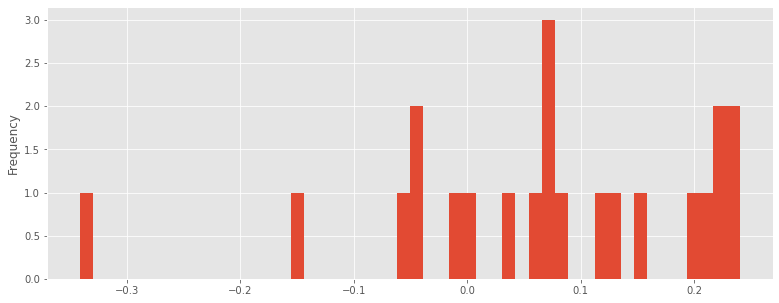

In [101]:
ambigious_ordered_df['Adj Close Daily Returns'].plot.hist(bins=50, figsize=(13, 5))

In [109]:
# mean, standard deviation, variance for 1999-present Dow for 'Adj Close Daily Returns'
mean_dow1 = np.mean(ambigious_ordered_df['Adj Close Daily Returns'])
std_dow1 = np.std(ambigious_ordered_df['Adj Close Daily Returns'])
var_dow1 = statistics.variance(ambigious_ordered_df['Adj Close Daily Returns'])
var2_dow1 = ambigious_ordered_df['Adj Close Daily Returns'].var()
mean_dow1, std_dow1, var_dow1, var2_dow1

(0.0683042236706282,
 0.13904473835201822,
 0.020254079228304116,
 0.02025407922830412)

In [110]:
# mean, standard deviation, variance for 1999-present Dow for 'Volume Daily Returns'
mean_dow2 = np.mean(ambigious_ordered_df['Volume Daily Returns'])
std_dow2 = np.std(ambigious_ordered_df['Volume Daily Returns'])
var_dow2 = statistics.variance(ambigious_ordered_df['Volume Daily Returns'])
var2_dow2 = ambigious_ordered_df['Volume Daily Returns'].var()
mean_dow2, std_dow2, var_dow2, var2_dow2

(11.156646695928337, 5.6414179919304095, 33.34110157680357, 33.341101576803574)

In [112]:
# CI for 'Adj Close Daily Returns'
se_acdr = np.std(dow_filtered1999['Adj Close Daily Returns']) / np.sqrt(len(dow_filtered1999['Adj Close Daily Returns']))
difference_means_distribution = stats.norm(0, se_acdr)
lower1, upper1 = (mean_dow1 + difference_means_distribution.ppf(0.95),
                mean_dow1 - difference_means_distribution.ppf(0.95))

In [111]:
## CI for 'Volume Daily Returns'
se_vdr = np.std(dow_filtered1999['Volume Daily Returns']) / np.sqrt(len(dow_filtered1999['Volume Daily Returns']))
difference_means_distribution = stats.norm(0, se_vdr)
lower2, upper2 = (mean_dow2 + difference_means_distribution.ppf(0.95),
                mean_dow2 - difference_means_distribution.ppf(0.95))

In [ ]:
# CI for 'Adj Close Daily Returns' below

In [113]:
norm_dow = stats.norm.ppf(0.95, loc=mean_dow, scale=std_dow)
lower1, upper1

(0.06857075100544949, 0.06803769633580692)

In [114]:
interval = std_dow*norm_dow

In [115]:
lower_95 = mean_dow - interval
upper_95 = mean_dow + interval
lower_95, upper_95

(-104.13110929311176, 126.44440268496845)

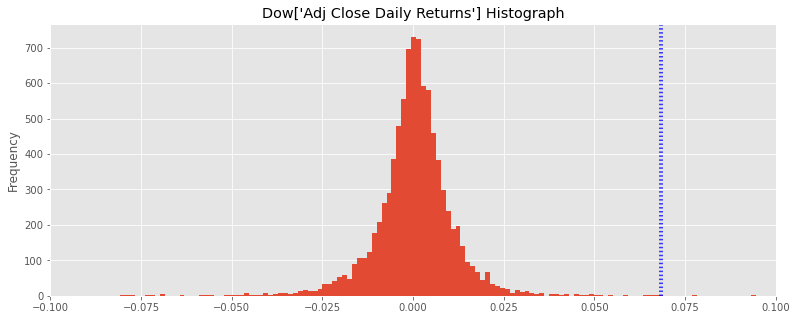

In [117]:
# fig, ax = plt.subplots(1, 2, figsize=(13, 5))
dow_filtered['Adj Close Daily Returns'].plot.hist(bins=250, figsize=(13, 5))
plt.title("Dow['Adj Close Daily Returns'] Histograph")
plt.xlim(-0.1, 0.1)
_ = plt.axvline(lower1, color='b', linestyle=':')
_ = plt.axvline(upper1, color='b', linestyle=':')

In [ ]:
# CI for 'Volume Daily Returns'

In [ ]:
########################################################

In [ ]:
# testing

In [ ]:
print(f'Lower 95% CI: {lower:2.7f}')
print(f'Upper 95% CI: {upper:2.7f}')